In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn import neighbors
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


In [3]:
# Choix de nos données pour comparer les différentes méthodes
indexes = np.random.randint(70000, size=7000)

data = mnist.data[indexes]
target = mnist.target[indexes]

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
    data, target, train_size=0.8
)

# Méthode K-NN

Pour la méthode k-NN, nous avons choisi les paramètres suivants
    - k=5
    - p=20
    - n_jobs = -1

In [4]:
# Méthode K-NN

clf = neighbors.KNeighborsClassifier(5, p=20, n_jobs = -1)

start_time = time.process_time()
clf.fit(xtrain, ytrain)
knn_fit_time = time.process_time() - start_time


start_time = time.process_time()
knn_score = clf.score(xtest, ytest)
knn_score_time = time.process_time() - start_time

knn_score_train = clf.score(xtrain, ytrain)


In [5]:
print("Score en train : " + str(knn_score_train))
print("Score en test : " + str(knn_score))

print("Temps pour l'entrainement : " + str(round(knn_fit_time, 2)) + " secondes")
print("Temps pour la classification : " + str(round(knn_score_time, 2)) + " secondes")

Score en train : 0.9605357142857143
Score en test : 0.9464285714285714
Temps pour l'entrainement : 0.15 secondes
Temps pour la classification : 203.49 secondes


# Méthode ANN

Pour la méthode ANN, nous avons choisi les paramètres suivants
    - 20 couches de 50 neurones
    - solver = adam
    - activation = identity
    - alpha = 0.0001

In [6]:
couche = (50,)

clf = MLPClassifier(hidden_layer_sizes=(couche*20), solver="adam", activation="identity", alpha=0.0001)

start_time = time.process_time()
clf.fit(xtrain, ytrain)
ann_fit_time = time.process_time() - start_time

start_time = time.process_time()
ann_score = clf.score(xtest, ytest)
ann_score_time = time.process_time() - start_time

ann_score_train = clf.score(xtrain, ytrain)


In [7]:
print("Score en train : " + str(ann_score_train))
print("Score en test : " + str(ann_score))

print("Temps pour l'entrainement : " + str(round(ann_fit_time, 2)) + " secondes")
print("Temps pour la classification : " + str(round(ann_score_time, 2)) + " secondes")

Score en train : 0.9621428571428572
Score en test : 0.8785714285714286
Temps pour l'entrainement : 50.92 secondes
Temps pour la classification : 0.03 secondes


# Méthode SVM

Pour la méthode SVM, nous avons choisi les paramètres suivants
    - kernel = poly
    - gamma = auto
    - pas de valeur particulière pour C, car ce paramètre n'influe pas significativement le résultat, comme nous l'avons vu précédemment

In [8]:
clf = SVC(kernel="poly", gamma="auto")

start_time = time.process_time()
clf.fit(xtrain, ytrain)
svm_fit_time = time.process_time() - start_time

start_time = time.process_time()
svm_score = clf.score(xtest, ytest)
svm_score_time = time.process_time() - start_time

svm_score_train = clf.score(xtrain, ytrain)

In [9]:
print("Score en train : " + str(svm_score_train))
print("Score en test : " + str(svm_score))

print("Temps pour l'entrainement : " + str(round(svm_fit_time, 2)) + " secondes")
print("Temps pour la classification : " + str(round(svm_score_time, 2)) + " secondes")

Score en train : 1.0
Score en test : 0.9457142857142857
Temps pour l'entrainement : 6.8 secondes
Temps pour la classification : 1.84 secondes


# Conclusion

Note : pour être certains que les valeurs de précision présentées dans cette conclusion soient cohérentes, et non pas un "coup de chance", nous avons relancé plusieurs fois les codes ci-dessus, pour plusieurs données différentes (elles sont choisies au hasard dans la troisième cellule) 

Les différents tests ci-dessus mettent en évidence que chaque modèle effectue des prédictions avec une forte précision si les hyper paramètres sont ajustés.

Dans notre cas, c'est la méthode SVM qui semble la plus adaptée, avec une précision autour de 0.94 et des temps d'entrainement et de prédiction relativement faibles.

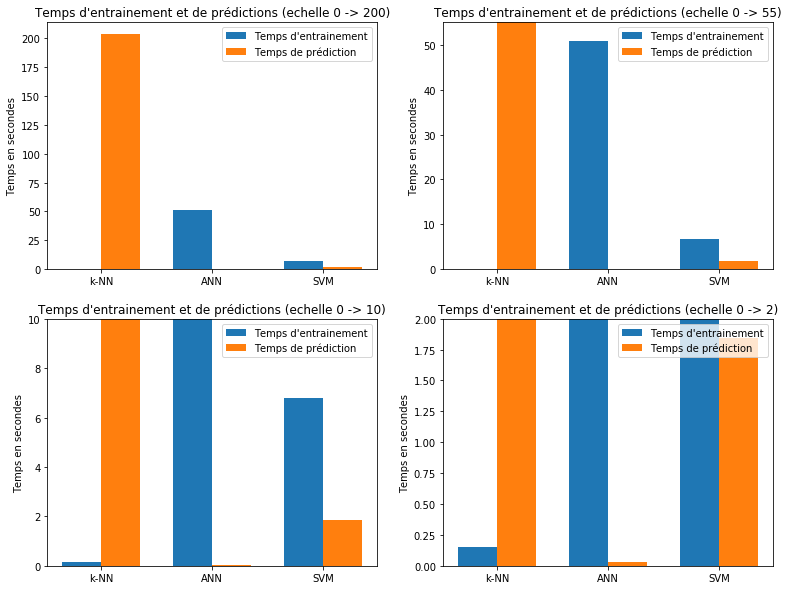

In [11]:
import numpy as np

plt.figure(figsize=(13, 10))



plt.subplot(2, 2, 1)

    
N = 3
fit = (knn_fit_time, ann_fit_time, svm_fit_time)
score = (knn_score_time, ann_score_time, svm_score_time)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, fit, width, label='Temps d\'entrainement')
plt.bar(ind + width, score, width,
    label='Temps de prédiction')

plt.ylabel('Temps en secondes')
plt.title('Temps d\'entrainement et de prédictions (echelle 0 -> 200)')

plt.xticks(ind + width / 2, ('k-NN', 'ANN', 'SVM'))
plt.legend(loc='best')

plt.subplot(2, 2, 2)


N = 3
fit = (knn_fit_time, ann_fit_time, svm_fit_time)
score = (knn_score_time, ann_score_time, svm_score_time)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, fit, width, label='Temps d\'entrainement')
plt.bar(ind + width, score, width,
    label='Temps de prédiction')

plt.ylabel('Temps en secondes')
plt.ylim(0, 55)
plt.title('Temps d\'entrainement et de prédictions (echelle 0 -> 55)')

plt.xticks(ind + width / 2, ('k-NN', 'ANN', 'SVM'))
plt.legend(loc='best')


plt.subplot(2, 2, 3)


N = 3
fit = (knn_fit_time, ann_fit_time, svm_fit_time)
score = (knn_score_time, ann_score_time, svm_score_time)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, fit, width, label='Temps d\'entrainement')
plt.bar(ind + width, score, width,
    label='Temps de prédiction')

plt.ylabel('Temps en secondes')
plt.ylim(0, 10)
plt.title('Temps d\'entrainement et de prédictions (echelle 0 -> 10)')

plt.xticks(ind + width / 2, ('k-NN', 'ANN', 'SVM'))
plt.legend(loc='best')

plt.subplot(2, 2, 4)



N = 3
fit = (knn_fit_time, ann_fit_time, svm_fit_time)
score = (knn_score_time, ann_score_time, svm_score_time)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, fit, width, label='Temps d\'entrainement')
plt.bar(ind + width, score, width,
    label='Temps de prédiction')

plt.ylabel('Temps en secondes')
plt.ylim(0, 2)
plt.title('Temps d\'entrainement et de prédictions (echelle 0 -> 2)')

plt.xticks(ind + width / 2, ('k-NN', 'ANN', 'SVM'))
plt.legend(loc='best')

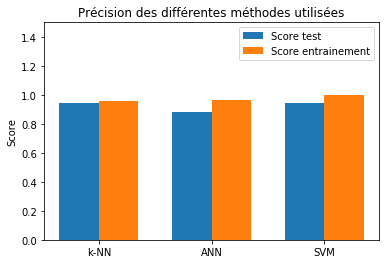

In [12]:
import numpy as np

    
N = 3
fit = (knn_score, ann_score, svm_score)
score = (knn_score_train, ann_score_train, svm_score_train)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, fit, width, label='Score test')
plt.bar(ind + width, score, width,
    label='Score entrainement')

plt.ylabel('Score')
plt.title('Précision des différentes méthodes utilisées')
plt.ylim(0, 1.5)
plt.xticks(ind + width / 2, ('k-NN', 'ANN', 'SVM'))
plt.legend(loc='best')